In [1]:
from ase.geometry.analysis import Analysis as asis
from ase.io import read, write
from ase.neighborlist import NeighborList as NL
from ase.neighborlist import natural_cutoffs
import numpy as np
from matplotlib import pyplot as plt
from rascal.representations import SphericalInvariants as SOAP
from tqdm.auto import tqdm
from matplotlib.pyplot import get_cmap
import os

In [2]:
cmap = get_cmap('Set1')

In [3]:
names = ['chair','twist-boat','boat','half-chair','planar']
conf_frames = [read(f'./cyclohexane_data/conformers/{k}.xyz') for k in 
               names]

In [5]:
# files = [
#     f'./cyclohexane_data/MD/trajectory_{f}.xyz' for f in range(10)
#     if os.path.exists(f'./cyclohexane_data/MD/trajectory_{f}.xyz')
# ]
# frames = [frame for file in files for frame in read(file, ':')]
files1 = [
    f'./cyclohexane_data/MD2/trajectory_{f}.xyz' for f in range(10)
    if os.path.exists(f'./cyclohexane_data/MD2/trajectory_{f}.xyz')
]
frames1 = [frame for file in files1 for frame in read(file, ':')]
energy = [frame.info['energy_eV'] for frame in frames]
energy1 = [frame.info['energy'] for frame in frames1]

No handles with labels found to put in legend.


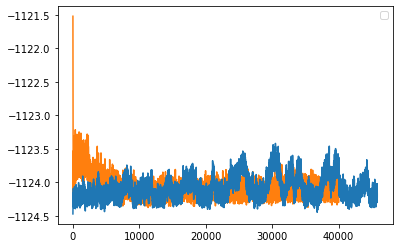

In [7]:
plt.plot(energy, 
         marker='o' if len(frames)<10 else None)
plt.plot(np.linspace(0, len(energy1), len(energy1)), energy1, zorder=-2)
# for n, frame in zip(names, conf_frames):
#         plt.axhline(frame.info['energy_eV'], label=n, 
#                     c=cmap(i/(len(conf_frames)-1)), 
#                     alpha=0.5, zorder=-1)
plt.legend()

In [45]:
nl = NL(
    cutoffs=np.multiply(1.2, natural_cutoffs(conf_frames[0])),
    bothways=True,
    self_interaction=False,
)
nl.update(conf_frames[0])
a = asis(conf_frames, nl=nl)
angles = a.get_angles("C", "C", "C", unique=True)
angle_vals = np.asarray(a.get_values(angles)) * np.pi / 180

In [46]:
from ase.visualize import view
view(conf_frames[1])

<Popen: returncode: None args: ['/opt/miniconda3/bin/python', '-m', 'ase', '...>

In [47]:
import pandas as pd

In [48]:
pd.DataFrame(angle_vals, columns=angles, index=names)

,"(1, 0, 5)","(0, 1, 2)","(1, 2, 3)","(2, 3, 4)","(3, 4, 5)","(0, 5, 4)"
chair,1.910544,1.910635,1.910582,1.910604,1.910634,1.910612
twist-boat,1.965445,1.941962,1.941962,1.965445,1.941962,1.941962
boat,1.942736,1.969595,1.969595,1.942736,1.969595,1.969595
half-chair,2.004308,1.904488,1.904488,2.004308,2.069974,2.069974
planar,2.094402,2.094392,2.094392,2.094402,2.094392,2.094392


In [49]:
angle_strain = abs(np.sum(angle_vals, axis=1) - (6 * 109.47 * np.pi / 180))

In [50]:
pd.DataFrame(angle_strain, index=names)

,0
chair,0.000061
twist-boat,0.235065
boat,0.300179
half-chair,0.493867
planar,1.102699


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
T = pca.fit_transform(angle_strain)
plt.scatter(T[:, 0], T[:,1], c=energy, s=4)

In [53]:
print('\n'.join(['{} {} {} {}'.format(s, *p) for s, p in zip(conf_frames[0].symbols, conf_frames[0].positions)]))

C 8.942505 7.5042015 7.2449625
C 8.217537 8.751345 7.755015
C 6.7750905 8.7471285 7.2449745
C 6.0575265 7.495758 7.755015
C 6.7824465 6.248697 7.2449955
C 8.224899 6.252915 7.755036
H 8.942526 7.504278 6.1550325
H 9.9701565 7.507233 7.6083165
H 8.2175745 8.7512715 8.845026
H 8.728797 9.6428445 7.391742
H 8.7413595 5.3644365 7.391697
H 8.224872 6.2528355 8.8449675
H 6.258624 9.6356055 7.6083135
H 6.7751595 8.7471225 6.1550115
H 6.0574575 7.495764 8.844978
H 5.029875 7.492728 7.391661
H 6.7823925 6.248634 6.155001
H 6.2711865 5.3571975 7.6082685
